29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Training data shape: (60000, 28, 28)
Testing data shape: (10000, 28, 28)


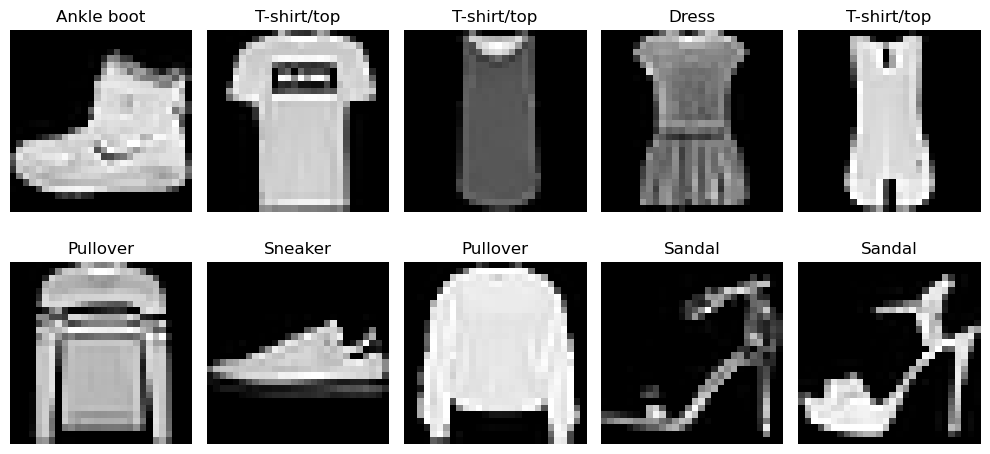

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.datasets import fashion_mnist

# Load the Fashion MNIST dataset
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

# Display the shape of the data
print(f"Training data shape: {x_train.shape}")
print(f"Testing data shape: {x_test.shape}")

# Define the class labels
class_labels = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
                'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Visualize a few images with their labels
plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(x_train[i], cmap='gray')
    plt.title(class_labels[y_train[i]])
    plt.axis('off')
plt.tight_layout()
plt.show()

In [3]:
# Normalize the image pixel values to [0, 1]
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Reshape the data to include a channel dimension (necessary for some models)
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

In [5]:
from tensorflow.keras.utils import to_categorical

# Convert labels to one-hot encoding
y_train_one_hot = to_categorical(y_train, num_classes=10)
y_test_one_hot = to_categorical(y_test, num_classes=10)

# Display the original and one-hot encoded labels for comparison
print(f"Original label: {y_train[0]}")
print(f"One-hot encoded label: {y_train_one_hot[0]}")

Original label: 9
One-hot encoded label: [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


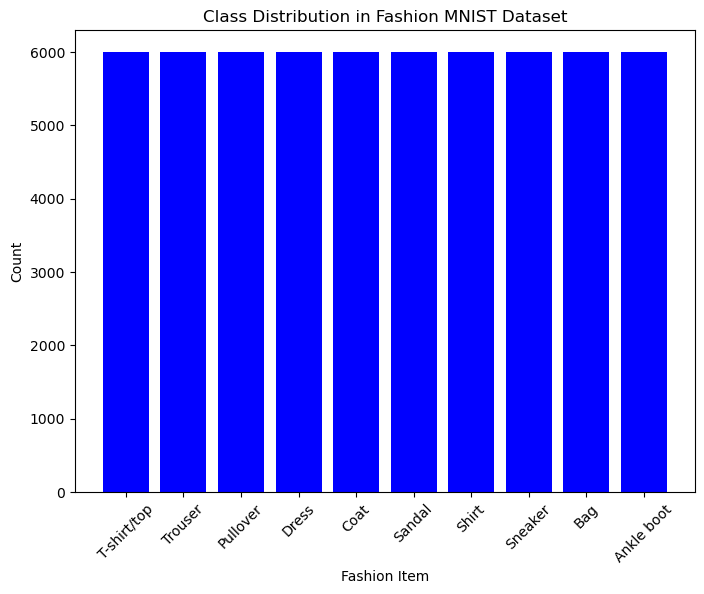

In [7]:
# Plot the distribution of fashion items in the dataset
plt.figure(figsize=(8, 6))
unique, counts = np.unique(y_train, return_counts=True)
plt.bar(class_labels, counts, color='blue')
plt.title('Class Distribution in Fashion MNIST Dataset')
plt.xlabel('Fashion Item')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout

# Define the Fully Connected Neural Network (FCNN)
model = Sequential([
    Flatten(input_shape=(28, 28, 1)),  # Flattens the 28x28 images into 1D vectors
    Dense(128, activation='relu'),    # First hidden layer with 128 neurons
    Dropout(0.2),                     # Dropout for regularization to reduce overfitting
    Dense(64, activation='relu'),     # Second hidden layer with 64 neurons
    Dropout(0.2),                     # Another dropout layer
    Dense(10, activation='softmax')   # Output layer with 10 neurons (one for each class)
])

# Display the model summary
model.summary()

C:\Users\suvee\anaconda3\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 109,386 (427.29 KB)

 Trainable params: 109,386 (427.29 KB)

 Non-trainable params: 0 (0.00 B)

In [11]:
from tensorflow.keras.optimizers import Adam

# Compile the model
model.compile(
    optimizer=Adam(learning_rate=0.001),  # Use a suitable learning rate
    loss='categorical_crossentropy',     # Loss function for multi-class classification
    metrics=['accuracy']                 # Metric to evaluate model performance
)

In [13]:
# Train the model
history = model.fit(
    x_train, 
    y_train_one_hot, 
    batch_size=64,  # Batch size of 64
    epochs=15,      # Train for 15 epochs
    validation_split=0.2,  # Use 20% of training data for validation
    verbose=1       # Display progress
)

Epoch 1/15
750/750 ━━━━━━━━━━━━━━━━━━━━ 11s 9ms/step - accuracy: 0.6853 - loss: 0.8904 - val_accuracy: 0.8493 - val_loss: 0.4143
Epoch 2/15
750/750 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.8356 - loss: 0.4600 - val_accuracy: 0.8559 - val_loss: 0.3945
Epoch 3/15
750/750 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.8525 - loss: 0.4048 - val_accuracy: 0.8643 - val_loss: 0.3686
Epoch 4/15
750/750 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.8632 - loss: 0.3771 - val_accuracy: 0.8702 - val_loss: 0.3569
Epoch 5/15
750/750 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.8671 - loss: 0.3624 - val_accuracy: 0.8750 - val_loss: 0.3402
Epoch 6/15
750/750 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.8749 - loss: 0.3408 - val_accuracy: 0.8792 - val_loss: 0.3327
Epoch 7/15
750/750 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.8777 - loss: 0.3331 - val_accuracy: 0.8782 - val_loss: 0.3332
Epoch 8/15
750/750 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.8794 - loss: 0.3257 - val_accuracy: 0

In [15]:
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(x_test, y_test_one_hot, verbose=1)

# Report the test accuracy
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8764 - loss: 0.3312
Test Loss: 0.3399
Test Accuracy: 0.8751


In [17]:
from tensorflow.keras.callbacks import EarlyStopping

# Add Early Stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Retrain with Early Stopping
history = model.fit(
    x_train, 
    y_train_one_hot, 
    batch_size=64, 
    epochs=15, 
    validation_split=0.2, 
    callbacks=[early_stopping], 
    verbose=1
)

Epoch 1/15
750/750 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.8954 - loss: 0.2785 - val_accuracy: 0.8867 - val_loss: 0.3105
Epoch 2/15
750/750 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.8967 - loss: 0.2750 - val_accuracy: 0.8905 - val_loss: 0.3053
Epoch 3/15
750/750 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.9023 - loss: 0.2607 - val_accuracy: 0.8880 - val_loss: 0.3207
Epoch 4/15
750/750 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.9014 - loss: 0.2651 - val_accuracy: 0.8910 - val_loss: 0.3216
Epoch 5/15
750/750 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.9016 - loss: 0.2608 - val_accuracy: 0.8856 - val_loss: 0.3175


In [19]:
from tensorflow.keras.optimizers import SGD

# Compile the model with SGD optimizer
model.compile(
    optimizer=SGD(learning_rate=0.01, momentum=0.9),  # SGD with momentum for better convergence
    loss='categorical_crossentropy',                 # Loss function for multi-class classification
    metrics=['accuracy']                             # Metric to evaluate performance
)

# Train the model
history = model.fit(
    x_train, 
    y_train_one_hot, 
    batch_size=64,         # Batch size of 64
    epochs=15,             # Train for 15 epochs
    validation_split=0.2,  # Use 20% of training data for validation
    verbose=1              # Display training progress
)

Epoch 1/15
750/750 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - accuracy: 0.9072 - loss: 0.2466 - val_accuracy: 0.8917 - val_loss: 0.3034
Epoch 2/15
750/750 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.9094 - loss: 0.2387 - val_accuracy: 0.8924 - val_loss: 0.2954
Epoch 3/15
750/750 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.9100 - loss: 0.2426 - val_accuracy: 0.8940 - val_loss: 0.2956
Epoch 4/15
750/750 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.9099 - loss: 0.2390 - val_accuracy: 0.8923 - val_loss: 0.3050
Epoch 5/15
750/750 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.9133 - loss: 0.2327 - val_accuracy: 0.8932 - val_loss: 0.2988
Epoch 6/15
750/750 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.9128 - loss: 0.2312 - val_accuracy: 0.8958 - val_loss: 0.2996
Epoch 7/15
750/750 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.9136 - loss: 0.2277 - val_accuracy: 0.8946 - val_loss: 0.2986
Epoch 8/15
750/750 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.9134 - loss: 0.2267 - val_accuracy: 0.

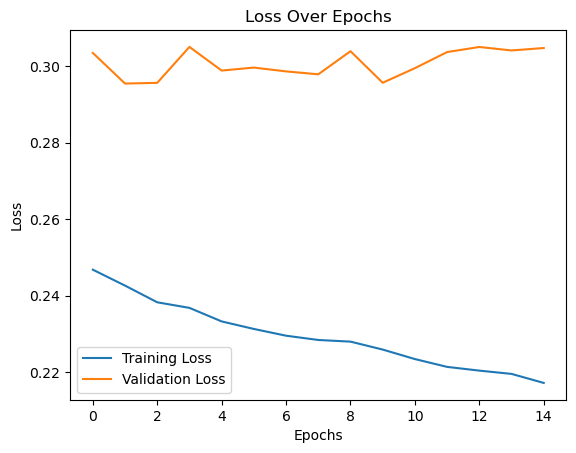

In [21]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

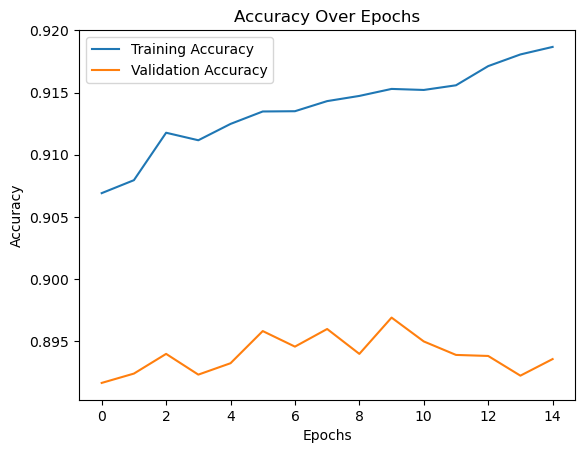

In [23]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [25]:
# Evaluate the model
test_loss, test_accuracy = model.evaluate(x_test, y_test_one_hot, verbose=1)

# Display results
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8905 - loss: 0.3285
Test Loss: 0.3303
Test Accuracy: 0.8890


In [27]:
# Extract training and validation metrics
training_loss = history.history['loss']
validation_loss = history.history['val_loss']
training_accuracy = history.history['accuracy']
validation_accuracy = history.history['val_accuracy']

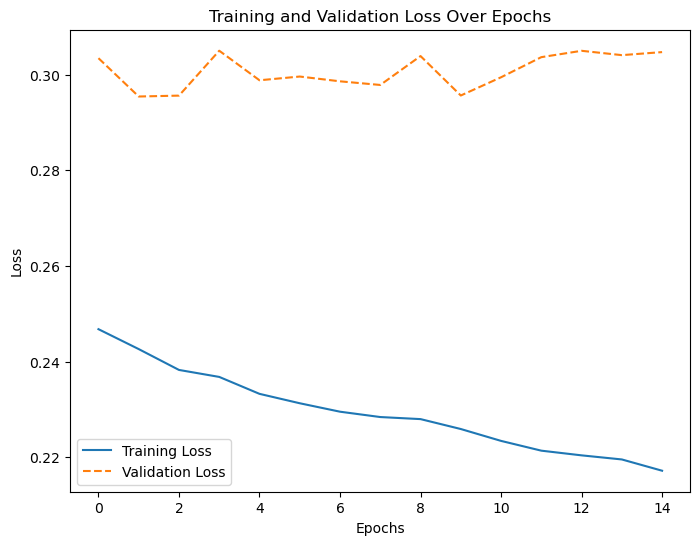

In [29]:
import matplotlib.pyplot as plt

# Plot training and validation loss
plt.figure(figsize=(8, 6))
plt.plot(training_loss, label='Training Loss')
plt.plot(validation_loss, label='Validation Loss', linestyle='--')
plt.title('Training and Validation Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

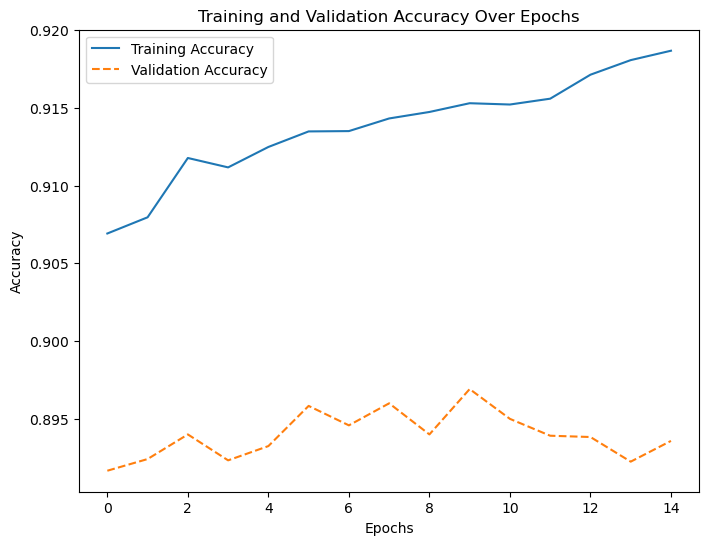

In [31]:
# Plot training and validation accuracy
plt.figure(figsize=(8, 6))
plt.plot(training_accuracy, label='Training Accuracy')
plt.plot(validation_accuracy, label='Validation Accuracy', linestyle='--')
plt.title('Training and Validation Accuracy Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [33]:
# Print final training and validation metrics
final_training_loss = training_loss[-1]
final_validation_loss = validation_loss[-1]
final_training_accuracy = training_accuracy[-1]
final_validation_accuracy = validation_accuracy[-1]

print(f"Final Training Loss: {final_training_loss:.4f}")
print(f"Final Validation Loss: {final_validation_loss:.4f}")
print(f"Final Training Accuracy: {final_training_accuracy:.4f}")
print(f"Final Validation Accuracy: {final_validation_accuracy:.4f}")

Final Training Loss: 0.2172
Final Validation Loss: 0.3047
Final Training Accuracy: 0.9187
Final Validation Accuracy: 0.8936
